In [4]:
# import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import scipy.stats as stats
import chardet


In [5]:
# Create path to CSV
gaming = Path("Clean Data/clean_game_data.csv")

In [6]:
# read in binary mode and detect encoding
with open("Clean Data/clean_game_data.csv", 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']



In [7]:
# Read in gaming data from CSV file
# Assign to dataframe called gaming_df
# Print value counts for whyplay column 
# Print entire dataframe
# Reads in gaming data from a CSV file into a dataframe 
# Prints the value counts for the 'whyplay' column
# Prints the entire dataframe
# Reads in gaming data from a CSV file into a dataframe
# Prints the value counts for the 'whyplay' column
# Prints the entire dataframe
# Read data file with Pandas
# gaming_df = pd.read_csv(gaming, encoding = "ISO-8859-1")
gaming_df = pd.read_csv(gaming)
gaming_df["whyplay"].value_counts()
gaming_df

,Unnamed: 0,S. No.,Game,Platform,Hours,earnings,whyplay,Gender,Age,Work,Degree,Residence,Playstyle,GAD_T,SWL_T,SPIN_T
0,0,1,Skyrim,Console (PS Xbox ...),15.0,I play for fun,having fun,Male,25,Unemployed / between jobs,Bachelor or equivalent,USA,Singleplayer,1,23,5.0
1,1,2,Other,PC,8.0,I play for fun,having fun,Male,41,Unemployed / between jobs,Bachelor or equivalent,USA,Multiplayer - online - with strangers,8,16,33.0
2,2,3,Other,PC,0.0,I play for fun,having fun,Female,32,Employed,Bachelor or equivalent,Germany,Singleplayer,8,17,31.0
3,3,4,Other,PC,20.0,I play for fun,improving,Male,28,Employed,Bachelor or equivalent,USA,Multiplayer - online - with online acquaintanc...,0,17,11.0
4,4,5,Other,Console (PS Xbox ...),20.0,I play for fun,having fun,Male,19,Employed,High school diploma (or equivalent),South Korea,Multiplayer - online - with strangers,14,14,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,13459,14246,Other,Console (PS Xbox ...),40.0,I play for fun,improving,Male,22,Student at college / university,Master or equivalent,France,Multiplayer - online - with strangers,4,28,7.0
13460,13460,14247,League of Legends,PC,20.0,I play for fun,winning,Female,20,Student at college / university,High school diploma (or equivalent),USA,Multiplayer - online - with strangers,20,23,25.0
13461,13461,14248,Starcraft 2,PC,20.0,I play for fun,having fun,Male,19,Student at college / university,High school diploma (or equivalent),Norway,Multiplayer - online - with real life friends,0,32,10.0
13462,13462,14249,Other,Console (PS Xbox ...),5.0,I play for fun,having fun,Female,18,Student at school,High school diploma (or equivalent),Canada,Singleplayer,13,16,32.0


In [33]:
gaming_df.columns

Index(['Unnamed: 0', 'S. No.', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'Gender', 'Age', 'Work', 'Degree', 'Residence', 'Playstyle',
       'GAD_T', 'SWL_T', 'SPIN_T'],
      dtype='object')

In [8]:
clean_game = gaming_df[["S. No.","Game","Platform","Hours","earnings","whyplay","Gender","Age","Work","Degree","Residence","Playstyle","GAD_T","SWL_T","SPIN_T"]]
clean_game

,S. No.,Game,Platform,Hours,earnings,whyplay,Gender,Age,Work,Degree,Residence,Playstyle,GAD_T,SWL_T,SPIN_T
0,1,Skyrim,Console (PS Xbox ...),15.0,I play for fun,having fun,Male,25,Unemployed / between jobs,Bachelor or equivalent,USA,Singleplayer,1,23,5.0
1,2,Other,PC,8.0,I play for fun,having fun,Male,41,Unemployed / between jobs,Bachelor or equivalent,USA,Multiplayer - online - with strangers,8,16,33.0
2,3,Other,PC,0.0,I play for fun,having fun,Female,32,Employed,Bachelor or equivalent,Germany,Singleplayer,8,17,31.0
3,4,Other,PC,20.0,I play for fun,improving,Male,28,Employed,Bachelor or equivalent,USA,Multiplayer - online - with online acquaintanc...,0,17,11.0
4,5,Other,Console (PS Xbox ...),20.0,I play for fun,having fun,Male,19,Employed,High school diploma (or equivalent),South Korea,Multiplayer - online - with strangers,14,14,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,14246,Other,Console (PS Xbox ...),40.0,I play for fun,improving,Male,22,Student at college / university,Master or equivalent,France,Multiplayer - online - with strangers,4,28,7.0
13460,14247,League of Legends,PC,20.0,I play for fun,winning,Female,20,Student at college / university,High school diploma (or equivalent),USA,Multiplayer - online - with strangers,20,23,25.0
13461,14248,Starcraft 2,PC,20.0,I play for fun,having fun,Male,19,Student at college / university,High school diploma (or equivalent),Norway,Multiplayer - online - with real life friends,0,32,10.0
13462,14249,Other,Console (PS Xbox ...),5.0,I play for fun,having fun,Female,18,Student at school,High school diploma (or equivalent),Canada,Singleplayer,13,16,32.0


In [9]:
clean_game.to_csv("clean_game_data.csv")


In [10]:
# Aliyu's Code Starts Here: How do people who play for money compare with people who play for fun?
#For Fun: Are people who play for fun are likely to be gainfully employed
# To get the total number of people that play for fun, we need to sum the number of people who play for fun
#money_players = df[df['MoneySpentPerWeek'] > 0]['MoneySpentPerWeek'].count()

Numb_of_people_whyplay = clean_game["whyplay"].value_counts()
Numb_of_people_whyplay

whyplay
having fun                                                                          5289
improving                                                                           4927
winning                                                                             2091
relaxing                                                                             654
All of the above                                                                      26
                                                                                    ... 
Making my brain go numb                                                                1
Combination: Winning / Having fun                                                      1
Improving + Fun                                                                        1
to be occupied                                                                         1
Mental priority is Fun>Improve>Win  actual priority once in game Win>Improve>Fun       1
Name: count, 

In [11]:
#Collect total number of people playing for earnings
total_numb_of_earning_players = clean_game['earnings'].value_counts()
total_numb_of_earning_players

earnings
I play for fun                                                                               12112
I play mostly for fun but earn a little on the side (tournament winnings  streaming  etc)      990
I earn a living by playing this game                                                            48
I play to win                                                                                    3
i try                                                                                            2
                                                                                             ...  
I play for fun  but if there's an opportunity to earn some money  I would love to.               1
Keep in touch w/ friends                                                                         1
I Play for fun and working on making earn out of it.                                             1
I play ranked mostly                                                                             1
S

In [12]:
#collect the total number of people that plays for fun only
total_fun_players =Numb_of_people_whyplay["having fun"].sum()
#total_fun_players
#collect the total number of people playing for money
total_money_players =Numb_of_people_whyplay["winning"].sum()
#total_money_players

In [13]:
#build a datafram that shows the number of people who play for fun and for winning
combined_data =pd.DataFrame({"Having fun":[total_fun_players],"Winning":[total_money_players]})
combined_data


,Having fun,Winning
0,5289,2091


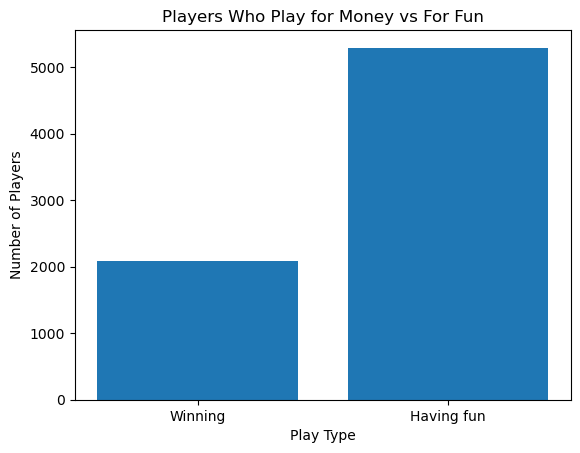

In [14]:
# I want to generate a bar chart to have proper visualization for both "Having fun" and "Winning of the data set in a pyplot"
# I am using pyplot for my barchart so as to have more control over my chart to
# Generate a bar plot showing the comparison between people who play for money vs for fun

money_df = combined_data[combined_data["Winning"] == 'Yes']
fun_df = combined_data[combined_data['Having fun'] == 'Yes']

x = ['Winning', 'Having fun']
y = [total_money_players,total_fun_players]

plt.bar(x,y)
plt.title('Players Who Play for Money vs For Fun')
plt.xlabel('Play Type')
plt.ylabel('Number of Players')

plt.show()



In [15]:
#For Fun: Are people who play for fun are likely to be gainfully employed
#to get the amoutn of people who play for fun are employed
#get the data of work from the clean_game dataframe
Employed_people = clean_game.loc[clean_game['Work'] == 'Employed']
Employed_people.head()



,S. No.,Game,Platform,Hours,earnings,whyplay,Gender,Age,Work,Degree,Residence,Playstyle,GAD_T,SWL_T,SPIN_T
2,3,Other,PC,0.0,I play for fun,having fun,Female,32,Employed,Bachelor or equivalent,Germany,Singleplayer,8,17,31.0
3,4,Other,PC,20.0,I play for fun,improving,Male,28,Employed,Bachelor or equivalent,USA,Multiplayer - online - with online acquaintanc...,0,17,11.0
4,5,Other,Console (PS Xbox ...),20.0,I play for fun,having fun,Male,19,Employed,High school diploma (or equivalent),South Korea,Multiplayer - online - with strangers,14,14,13.0
5,6,Other,Console (PS Xbox ...),4.0,I play for fun,relaxing,Male,24,Employed,Bachelor or equivalent,USA,Multiplayer - online - with real life friends,1,17,13.0
6,7,Other,PC,30.0,I play for fun,relaxing,Male,29,Employed,High school diploma (or equivalent),USA,Multiplayer - online - with online acquaintanc...,0,16,26.0


In [16]:
Numb_of_people_work = clean_game["Work"].value_counts()
Numb_of_people_work

Work
Student at college / university    7073
Employed                           2734
Student at school                  2229
Unemployed / between jobs          1390
Name: count, dtype: int64

In [40]:
Employed_people = Numb_of_people_work["Employed"]
Employed_people

2734

In [50]:
Unemployed_people = Numb_of_people_work["Unemployed / between jobs"].sum()
Unemployed_people

1390

In [31]:
Wanted_df = clean_game[["whyplay","Work"]]
Wanted_df.head

<bound method NDFrame.head of           whyplay                             Work
0      having fun        Unemployed / between jobs
1      having fun        Unemployed / between jobs
2      having fun                         Employed
3       improving                         Employed
4      having fun                         Employed
...           ...                              ...
13459   improving  Student at college / university
13460     winning  Student at college / university
13461  having fun  Student at college / university
13462  having fun                Student at school
13463   improving  Student at college / university

[13464 rows x 2 columns]>

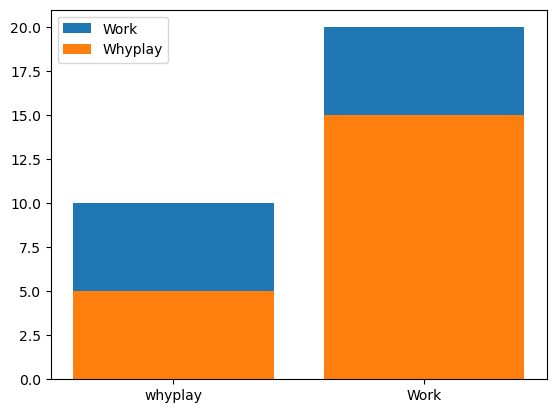

In [35]:
x = ['whyplay','Work']
y1 = [10,20]
y2 = [5,15]
plt.bar(x,y1,label='Work')
plt.bar(x,y2,label='Whyplay')
plt.legend()
plt.show()


In [20]:
# Build a datafram for both whyplay(having_fun) and Work(Employed)
Combined_df =pd.DataFrame({"Having fun":[total_fun_players],"Employed":[Employed_people]})
Combined_df.head()

,Having fun,Employed
0,5289,2734


In [21]:
# Filter data to only people who are having fun

having_fun = ["Having fun", "Employment"]

# Filter having_fun data to employment categories#
having_fun_employment = Combined_df[Combined_df['Having fun'].isin(having_fun)]
having_fun_employment

# Create bar chart of employment for people having fun





,Having fun,Employed


In [39]:
#% of employed vs % of unemployed
# % of employed
employed_df = Numb_of_people_work ["Employed"].sum()
percentage_employed_df = employed_df / (Numb_of_people_work) * 100
percentage_employed_df


Work
Student at college / university     38.654036
Employed                           100.000000
Student at school                  122.655900
Unemployed / between jobs          196.690647
Name: count, dtype: float64

In [ ]:
#Aliyu's code stops here

#Amy's code starts here

In [ ]:
#Amy's code starts here
#Andrew's code starts here

In [ ]:
#Anna's code stops here
#Andrew's code starts here